In [239]:
#import necesseary modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from pylab import rcParams
rcParams['figure.figsize'] = 20, 16
import sys
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import datasets 
import statsmodels.api as sm
from sklearn import linear_model
import random
from random import uniform
import seaborn as sb
import seaborn as sns
import math
import requests
import html5lib
import re
import bs4
from bs4 import BeautifulSoup
from google.colab import drive
from google.colab import data_table
data_table.enable_dataframe_formatter()
from vega_datasets import data
import csv
import os
from google.colab import drive
import glob
from scipy.stats import pearsonr
import scipy
import scipy.stats
from scipy.stats import t
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from functools import reduce
pd.set_option("display.max_rows", None, "display.max_columns", None)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [240]:
#import excel file cost nonfuel energy
df_nonfuel = pd.read_csv("/content/drive/MyDrive/levelized-cost-of-energy.csv", encoding= 'latin-1')
#reset index
# setting entity as index but permanently
df_nonfuel.set_index("Entity", inplace=True)
#drop column
df_nonfuel.drop(columns=['Code'], inplace= True)
df_nonfuel.head(15)

,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
Entity,,,,,,,,
Australia,2010,NaN,NaN,NaN,0.423957,NaN,NaN,NaN
Australia,2011,NaN,NaN,NaN,0.430691,NaN,NaN,NaN
Australia,2012,NaN,NaN,NaN,0.261030,NaN,NaN,NaN
Australia,2013,NaN,NaN,NaN,0.150157,NaN,NaN,NaN
Australia,2014,NaN,NaN,NaN,0.123621,NaN,NaN,NaN
Australia,2015,NaN,NaN,NaN,0.106613,NaN,NaN,NaN
Australia,2016,NaN,NaN,NaN,0.082029,NaN,NaN,NaN
Australia,2017,NaN,NaN,NaN,0.089928,NaN,NaN,NaN
Australia,2018,NaN,NaN,NaN,0.074069,NaN,NaN,NaN


In [241]:
#drop duplicates
df_nonfuel.drop_duplicates(inplace=True)

In [242]:
#drop nan values
df_clean_values = df_nonfuel.dropna()
df_clean_values.head(20)

,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
Entity,,,,,,,,
World,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
World,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
World,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
World,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
World,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
World,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
World,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
World,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
World,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592


In [243]:
#check columns
df_clean_values.columns

Index(['Year', 'Bioenergy levelized cost of energy',
       'Geothermal levelized cost of energy',
       'Offshore wind levelized cost of energy',
       'Solar photovoltaic levelized cost of energy',
       'Concentrated solar power levelized cost of energy',
       'Hydropower levelized cost of energy',
       'Onshore wind levelized cost of energy'],
      dtype='object')

In [322]:
#rename columns to make it more easy to use
df_energy_names= df_clean_values.rename(columns={'Year': "year",
                                            "Bioenergy levelized cost of energy": "biopower",
                                            'Geothermal levelized cost of energy': 'geothermal',
                                            'Offshore wind levelized cost of energy': 'seawindpower',
                                            'Solar photovoltaic levelized cost of energy': 'pv-celpower',
                                            'Concentrated solar power levelized cost of energy': 'solarpower', 
                                            'Hydropower levelized cost of energy':'hydropower',
                                            'Onshore wind levelized cost of energy': 'landwindpower'})
df_energy_names

,year,biopower,geothermal,seawindpower,pv-celpower,solarpower,hydropower,landwindpower
Entity,,,,,,,,
World,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
World,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
World,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
World,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
World,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
World,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
World,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
World,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
World,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592


In [323]:
#see the correlation 
df_correlation = df_energy_names.corr()
df_correlation

,year,biopower,geothermal,seawindpower,pv-celpower,solarpower,hydropower,landwindpower
year,1.000000,-0.445295,0.003987,-0.970874,-0.898425,-0.915989,0.540897,-0.994930
biopower,-0.445295,1.000000,-0.504408,0.559317,0.397438,0.238899,0.101038,0.494959
geothermal,0.003987,-0.504408,1.000000,-0.050229,-0.213328,0.149987,0.064293,0.000725
seawindpower,-0.970874,0.559317,-0.050229,1.000000,0.853756,0.818629,-0.547824,0.977035
pv-celpower,-0.898425,0.397438,-0.213328,0.853756,1.000000,0.860403,-0.492240,0.879669
solarpower,-0.915989,0.238899,0.149987,0.818629,0.860403,1.000000,-0.480878,0.893839
hydropower,0.540897,0.101038,0.064293,-0.547824,-0.492240,-0.480878,1.000000,-0.497911
landwindpower,-0.994930,0.494959,0.000725,0.977035,0.879669,0.893839,-0.497911,1.000000


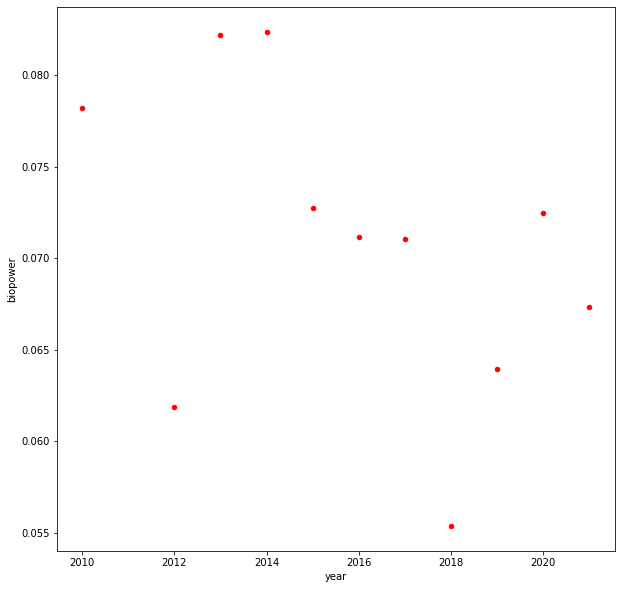

In [301]:
#single plot column Concentrating solar power
dfB = df_energy_names.plot.scatter(x="year", y="biopower", color = "red", figsize = (10,10))
plt.show()

In [302]:
#making the dataset for the linear regression calculation
df_year = df_energy_names[["year"]]
dfB= df_energy_names[["biopower"]]

In [303]:
#A quick solution would involve using pd.to_numeric to convert whatever strings your data might contain to numeric values. If they're incompatible with conversion, they'll be reduced to NaNs.
df_year= df_year.apply(pd.to_numeric, errors='coerce')
bio_pred= dfB.apply(pd.to_numeric, errors='coerce')

In [304]:
#Furthermore, you can choose to fill those values with some default:
df_year.fillna(0, inplace=True)
bio_pred.fillna(0, inplace=True)

In [305]:
regressor = LinearRegression()
regressor.fit(df_year, dfB)

LinearRegression()

In [308]:
bio_pred = regressor.predict(df_year)

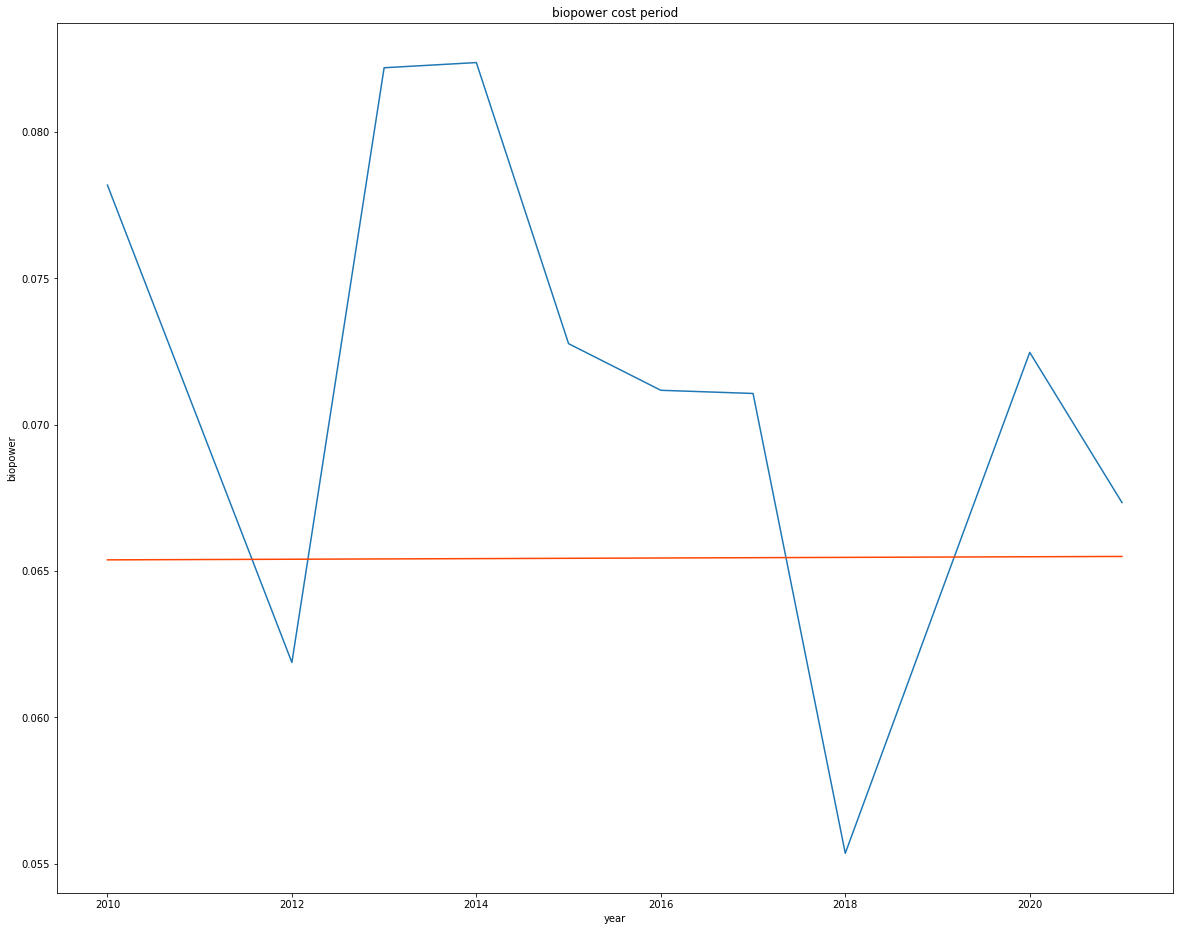

In [320]:
#Visualising the set results
fig, ax = plt.subplots()
plt.plot(df_year, dfB)
plt.plot(df_year, regressor.predict(df_year), color = 'orangered')
plt.title('biopower cost period')
plt.xlabel('year')
plt.ylabel('biopower')
plt.show()

#Here you see clearly how the cost for bio goes up and down because of the resources you can or cannot use anymore

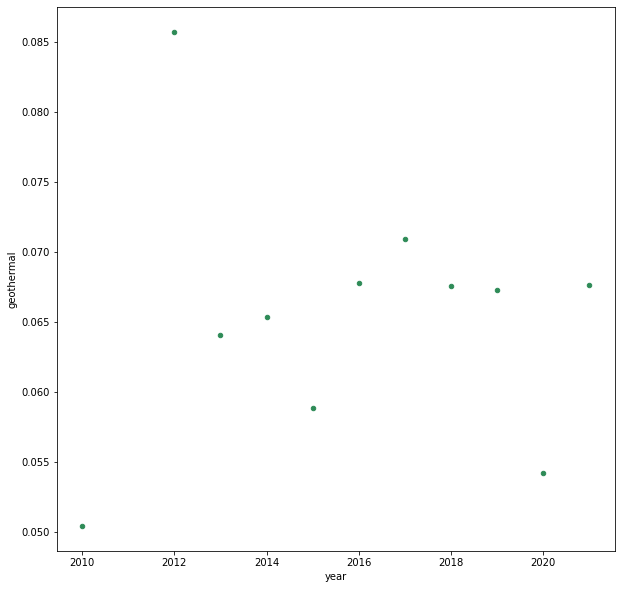

In [311]:
#single plot column Offshore wind
dfG = df_energy_names.plot.scatter(x="year", y="geothermal", color = "seagreen", figsize = (10,10))
plt.show()

In [312]:
#making the dataset for the linear regression calculation
df_year = df_energy_names[["year"]]
dfG = df_energy_names[["geothermal"]]

In [313]:
#A quick solution would involve using pd.to_numeric to convert whatever strings your data might contain to numeric values. If they're incompatible with conversion, they'll be reduced to NaNs.
df_year = df_year.apply(pd.to_numeric, errors='coerce')
dfG = dfG.apply(pd.to_numeric, errors='coerce')

In [314]:
#Furthermore, you can choose to fill those values with some default:
df_year.fillna(0, inplace=True)
dfG.fillna(0, inplace=True)

In [315]:
regressor = LinearRegression()
regressor.fit(df_year, dfG)

LinearRegression()

In [316]:
#Predicting the set results
y_pred = regressor.predict(df_year)

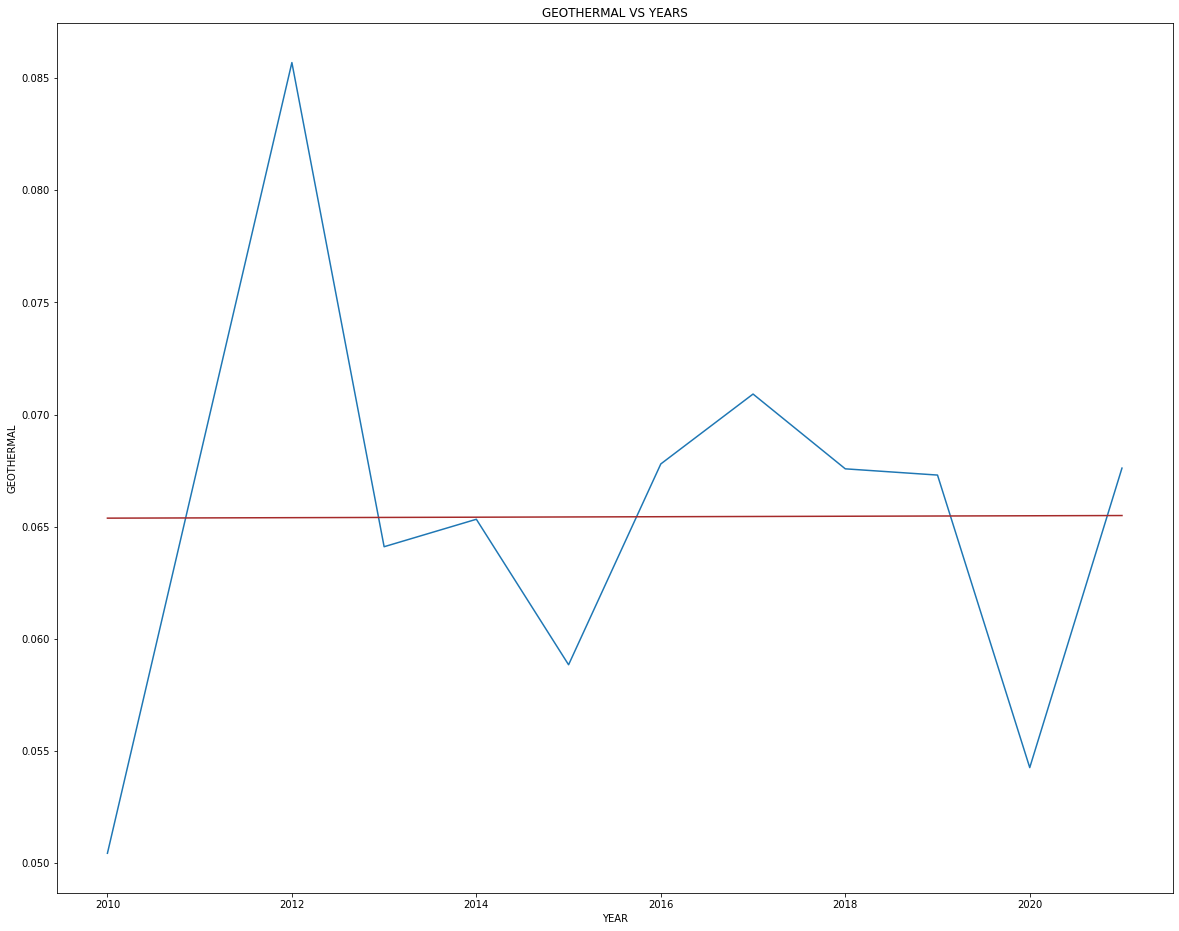

In [321]:
#Visualising the set results
fig, ax = plt.subplots()
plt.plot(df_year, dfG)
plt.plot(df_year, regressor.predict(df_year), color = 'brown')
plt.title('GEOTHERMAL VS YEARS')
plt.xlabel('YEAR')
plt.ylabel('GEOTHERMAL')
plt.show()

#Here you see the cost of geothermal cost stil levelled thru the years

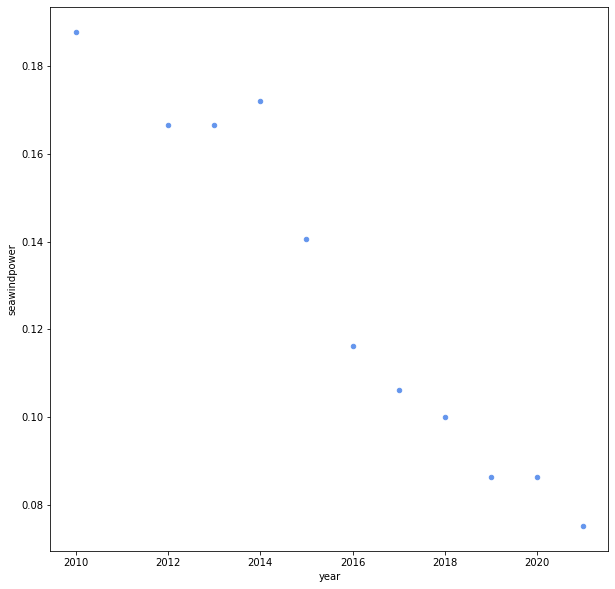

In [324]:
#single plot column Concentrating solar power
dfSE = df_energy_names.plot.scatter(x="year", y="seawindpower", color = "cornflowerblue", figsize = (10,10))
plt.show()

In [325]:
#making the dataset for the linear regression calculation
df_year = df_energy_names[["year"]]
dfSE = df_energy_names[["seawindpower"]]

In [326]:
#A quick solution would involve using pd.to_numeric to convert whatever strings your data might contain to numeric values. If they're incompatible with conversion, they'll be reduced to NaNs.
df_year = df_year.apply(pd.to_numeric, errors='coerce')
dfSE= dfSE.apply(pd.to_numeric, errors='coerce')

In [327]:
#Furthermore, you can choose to fill those values with some default:
df_year.fillna(0, inplace=True)
dfSE.fillna(0, inplace=True)

In [328]:
#see if it is a linearregression
regressor = LinearRegression()
regressor.fit(df_year, dfSE)

LinearRegression()

In [329]:
#Predicting the set results
y_pred = regressor.predict(df_year)

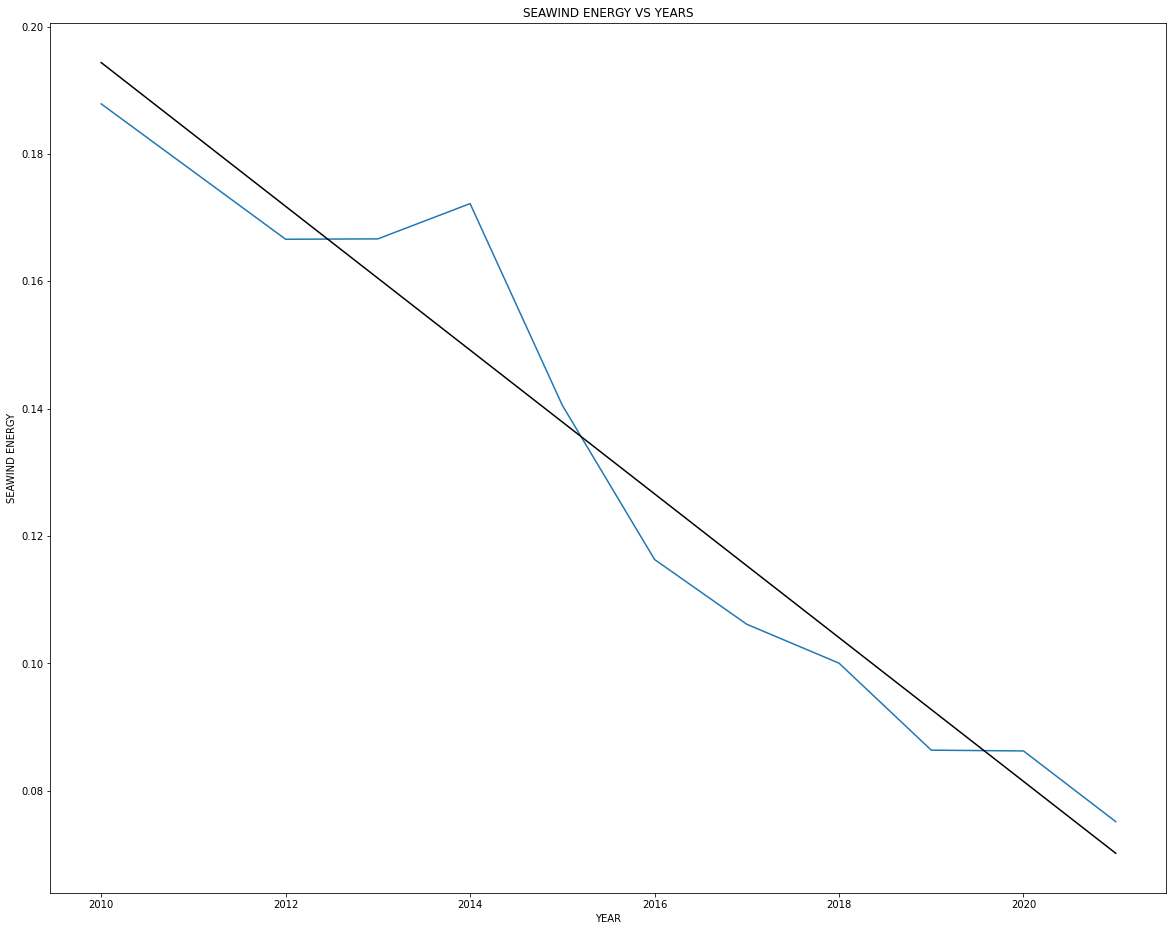

In [334]:
#Visualising the set results
fig, ax = plt.subplots()
plt.plot(df_year, dfSE)
plt.plot(df_year, regressor.predict(df_year), color = 'black')
plt.title('SEAWIND ENERGY VS YEARS')
plt.xlabel('YEAR')
plt.ylabel('SEAWIND ENERGY')
plt.show()

#in this plot you see that cost power from the sea goes down quickly

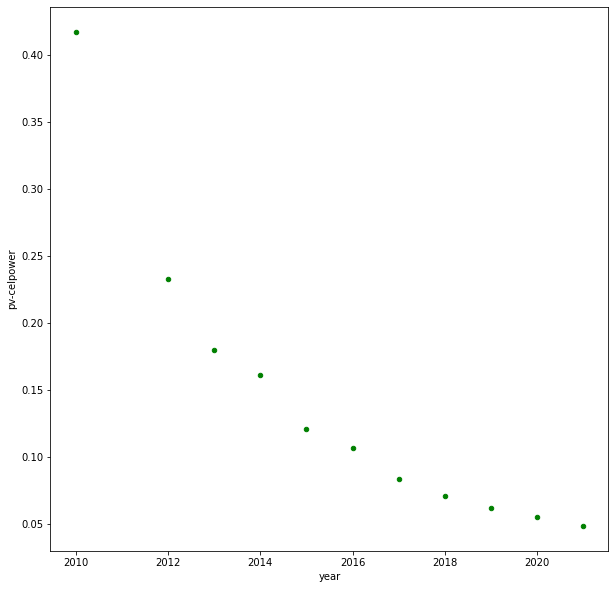

In [337]:
#single plot column Concentrating solar power
dfP = df_energy_names.plot.scatter(x="year", y="pv-celpower", color = "green", figsize = (10,10))
plt.show()

In [338]:
#making the dataset for the linear regression calculation
df_year= df_energy_names[["year"]]
dfP = df_energy_names[["pv-celpower"]]

In [339]:
#A quick solution would involve using pd.to_numeric to convert whatever strings your data might contain to numeric values. If they're incompatible with conversion, they'll be reduced to NaNs.
df_year = df_year.apply(pd.to_numeric, errors='coerce')
dfP =dfP.apply(pd.to_numeric, errors='coerce')

In [340]:
#Furthermore, you can choose to fill those values with some default:
df_year.fillna(0, inplace=True)
dfP.fillna(0, inplace=True)

In [341]:
#see if it is a linearregression
regressor = LinearRegression()
regressor.fit(df_year, dfP)

LinearRegression()

In [342]:
#Predicting the set results
y_pred = regressor.predict(df_year)

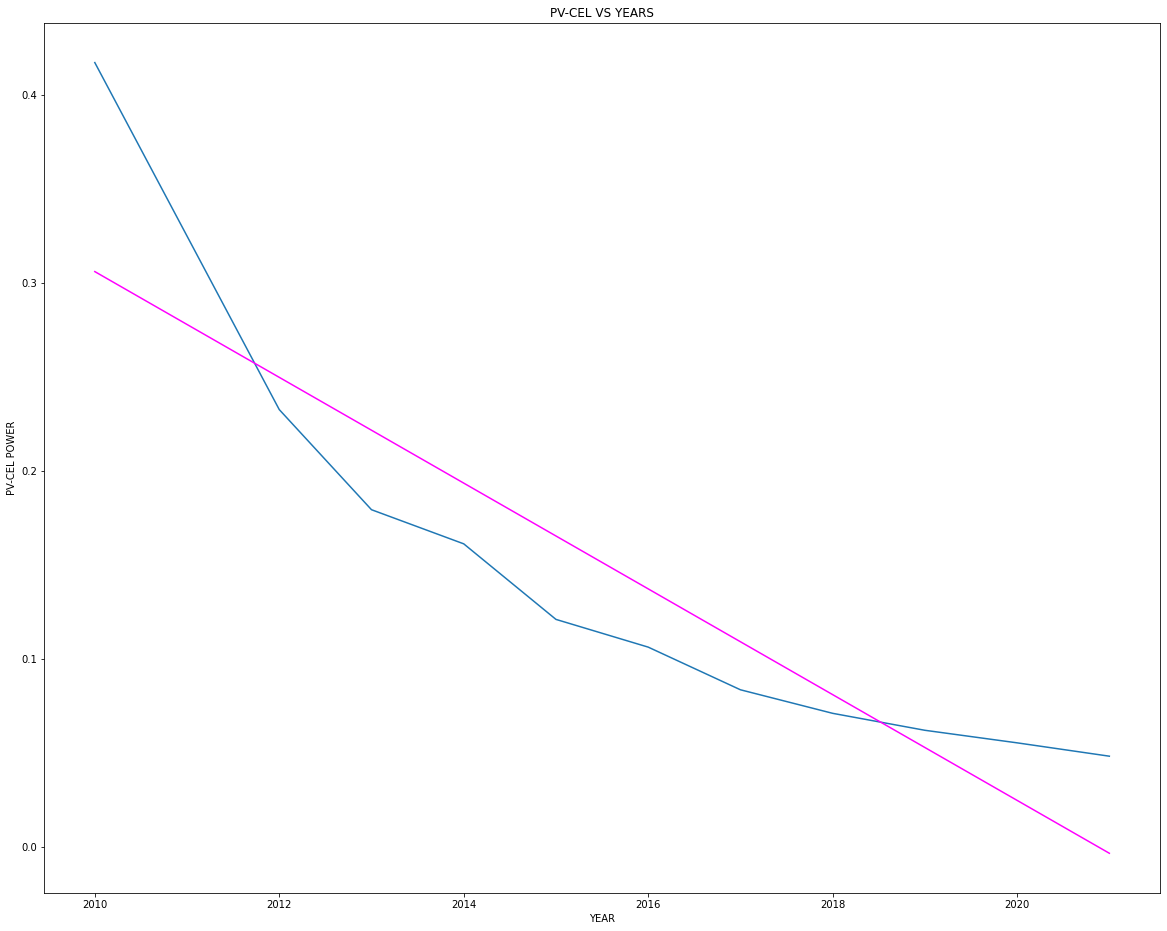

In [343]:
#Visualising the set results
#Visualising the set results
fig, ax = plt.subplots()
plt.plot(df_year, dfP)
plt.plot(df_year, regressor.predict(df_year), color = 'fuchsia')
plt.title('PV-CEL VS YEARS')
plt.xlabel('YEAR')
plt.ylabel('PV-CEL POWER')
plt.show()

#also pv-cel energy started pretty high but with government support you see the prices for alternatives energy sources slowly goes down

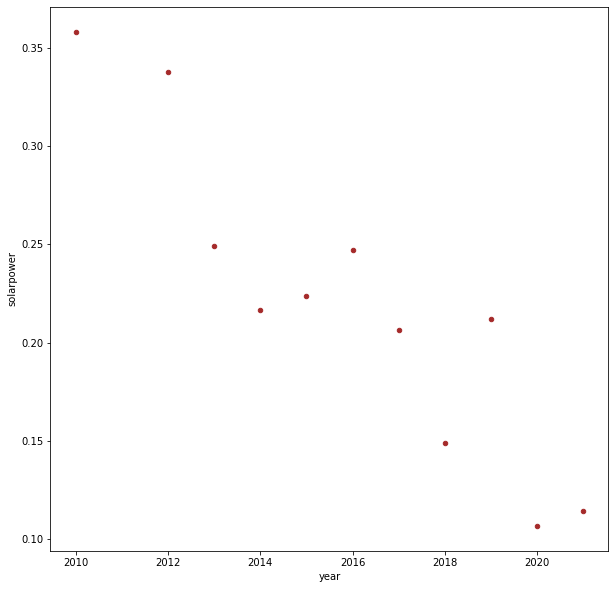

In [345]:
#single plot column Concentrating solar power
dfS = df_energy_names.plot.scatter(x="year", y="solarpower", color = "brown", figsize = (10,10))
plt.show()

In [346]:
#making the dataset for the linear regression calculation
df_year = df_energy_names[["year"]]
dfS = df_energy_names[["solarpower"]]

In [347]:
#A quick solution would involve using pd.to_numeric to convert whatever strings your data might contain to numeric values. If they're incompatible with conversion, they'll be reduced to NaNs.
df_year = df_year.apply(pd.to_numeric, errors='coerce')
dfS = dfS.apply(pd.to_numeric, errors='coerce')

In [348]:
#Furthermore, you can choose to fill those values with some default:
df_year.fillna(0, inplace=True)
dfS.fillna(0, inplace=True)

In [349]:
#see if it is a linearregression
regressor = LinearRegression()
regressor.fit(df_year, dfS)

LinearRegression()

In [350]:
#Predicting the set results
y_pred = regressor.predict(df_year)

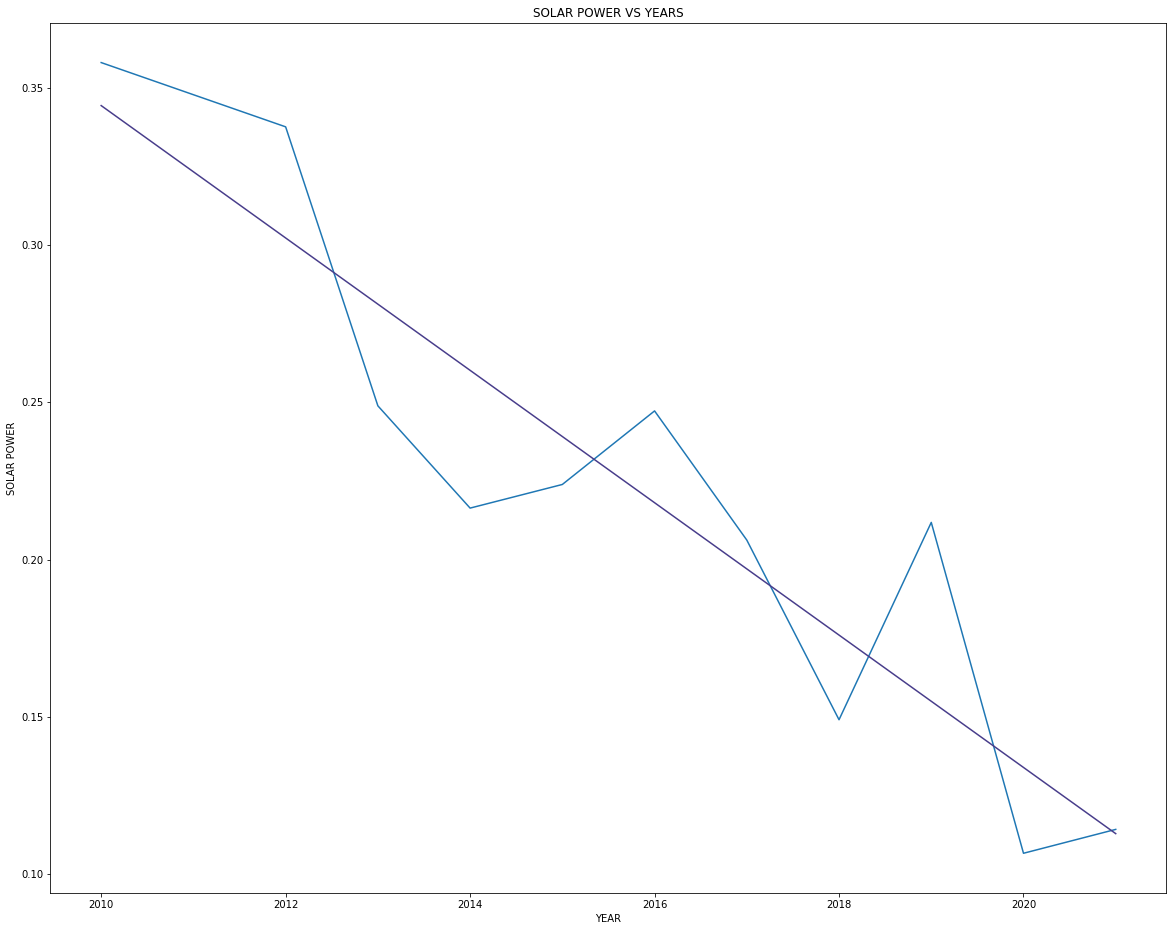

In [351]:
#Visualising the set results
#Visualising the set results
fig, ax = plt.subplots()
plt.plot(df_year, dfS)
plt.plot(df_year, regressor.predict(df_year), color = 'darkslateblue')
plt.title('SOLAR POWER VS YEARS')
plt.xlabel('YEAR')
plt.ylabel('SOLAR POWER')
plt.show()

#thru a period of ten years you see the cost for solarpower rocks pretty much

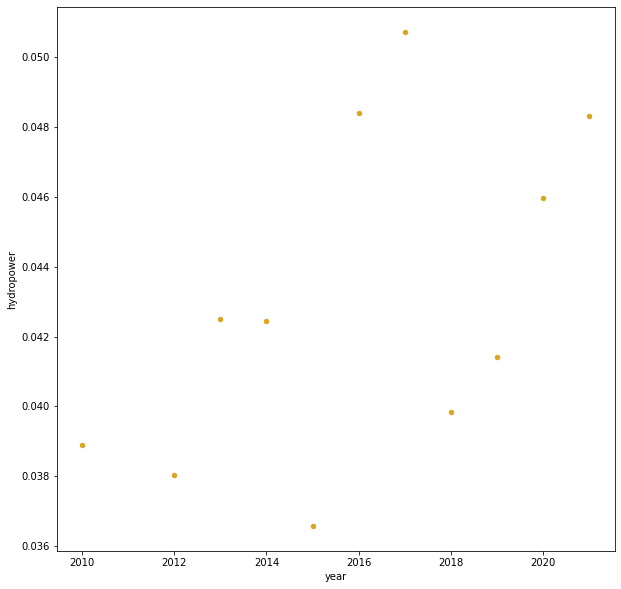

In [353]:
#single plot column Concentrating solar power
dfH = df_energy_names.plot.scatter(x="year", y="hydropower", color = "goldenrod", figsize = (10,10))
plt.show()

In [354]:
#making the dataset for the linear regression calculation
df_year= df_energy_names[["year"]]
dfH= df_energy_names[["hydropower"]]

In [355]:
#A quick solution would involve using pd.to_numeric to convert whatever strings your data might contain to numeric values. If they're incompatible with conversion, they'll be reduced to NaNs.
df_year = df_year.apply(pd.to_numeric, errors='coerce')
dfH = dfH.apply(pd.to_numeric, errors='coerce')

In [356]:
#Furthermore, you can choose to fill those values with some default:
df_year.fillna(0, inplace=True)
dfH.fillna(0, inplace=True)

In [357]:
#see if it is a linearregression
regressor = LinearRegression()
regressor.fit(df_year, dfH)

LinearRegression()

In [358]:
#Predicting the set results
y_pred = regressor.predict(df_year)

Text(0, 0.5, 'HYDROPOWER')

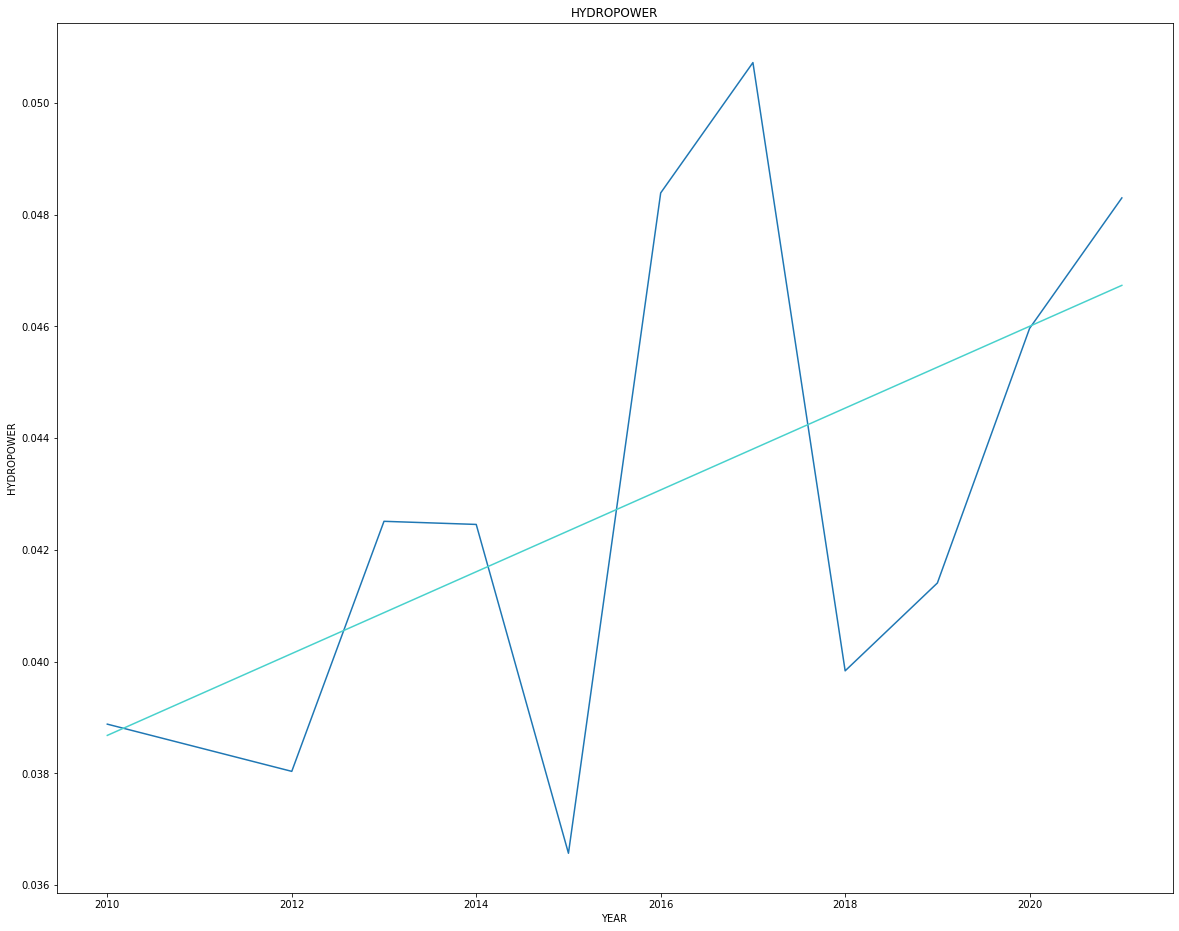

In [359]:
#Visualising the set results
fig, ax = plt.subplots()
plt.plot(df_year, dfH)
plt.plot(df_year, regressor.predict(df_year), color = 'mediumturquoise')
plt.title('HYDROPOWER')
plt.xlabel('YEAR')
plt.ylabel('HYDROPOWER')

#here you see that cost of hydropower also rocks over the years, now you see it goes up again

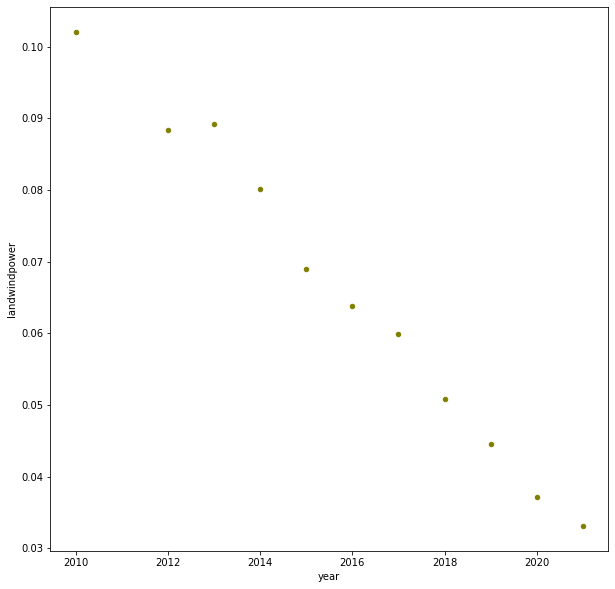

In [361]:
#single plot column Concentrating solar power
dfL = df_energy_names.plot.scatter(x="year", y="landwindpower", color = "olive", figsize = (10,10))
plt.show()

In [362]:
#making the dataset for the linear regression calculation
df_year = df_energy_names[["year"]]
dfL = df_energy_names[["landwindpower"]]

In [363]:
#A quick solution would involve using pd.to_numeric to convert whatever strings your data might contain to numeric values. If they're incompatible with conversion, they'll be reduced to NaNs.
df_year = df_year.apply(pd.to_numeric, errors='coerce')
dfL = dfL.apply(pd.to_numeric, errors='coerce')

In [364]:
#Furthermore, you can choose to fill those values with some default:
df_year.fillna(0, inplace=True)
dfL.fillna(0, inplace=True)

In [365]:
#see if it is a linearregression
regressor = LinearRegression()
regressor.fit(df_year, dfL)

LinearRegression()

In [366]:
#Predicting the set results
y_pred = regressor.predict(df_year)

Text(0, 0.5, 'LANDWIND ENERGY')

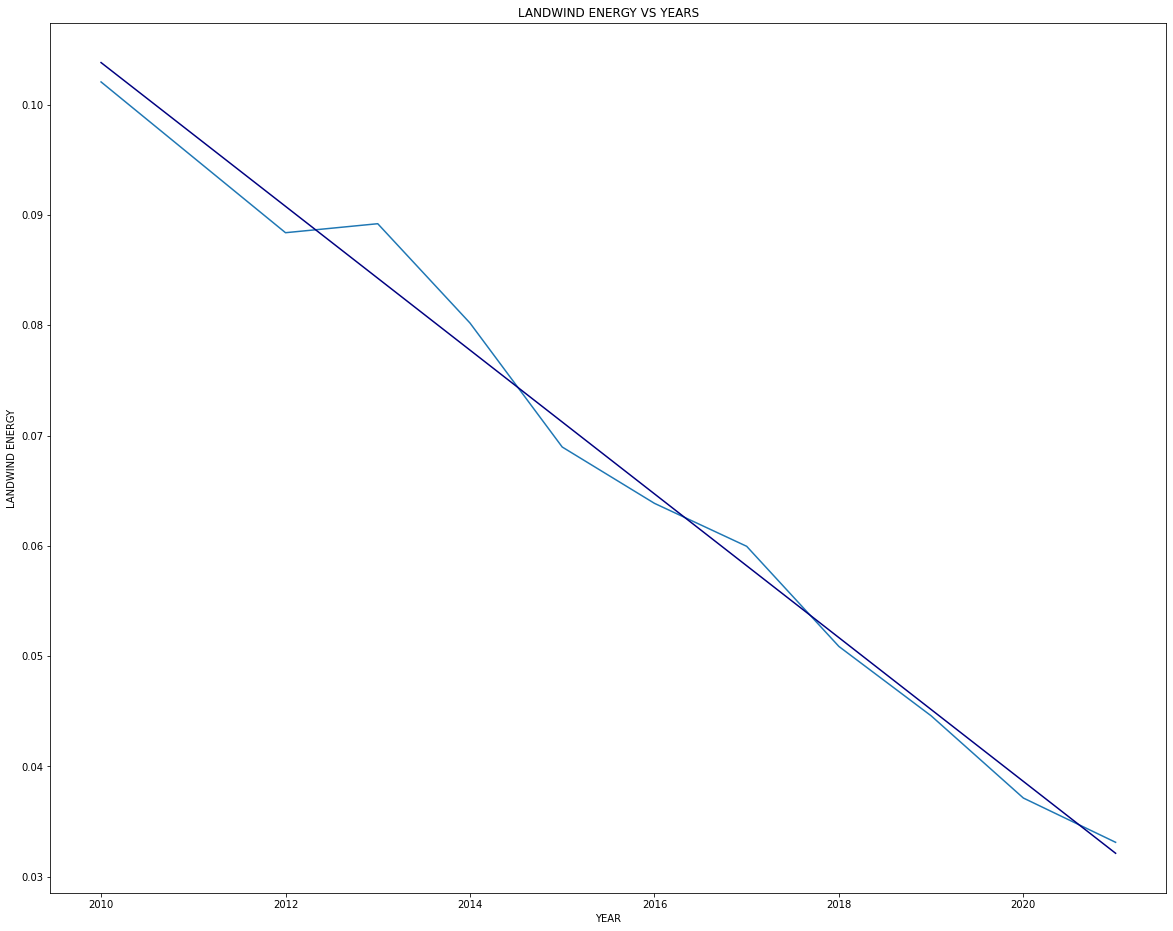

In [367]:
#Visualising the set results
fig, ax = plt.subplots()
plt.plot(df_year, dfL)
plt.plot(df_year, regressor.predict(df_year), color = 'navy')
plt.title('LANDWIND ENERGY VS YEARS')
plt.xlabel('YEAR')
plt.ylabel('LANDWIND ENERGY')

#Here you see onshore wind energy gradual goes down, so its a very interesting option for the future

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/p

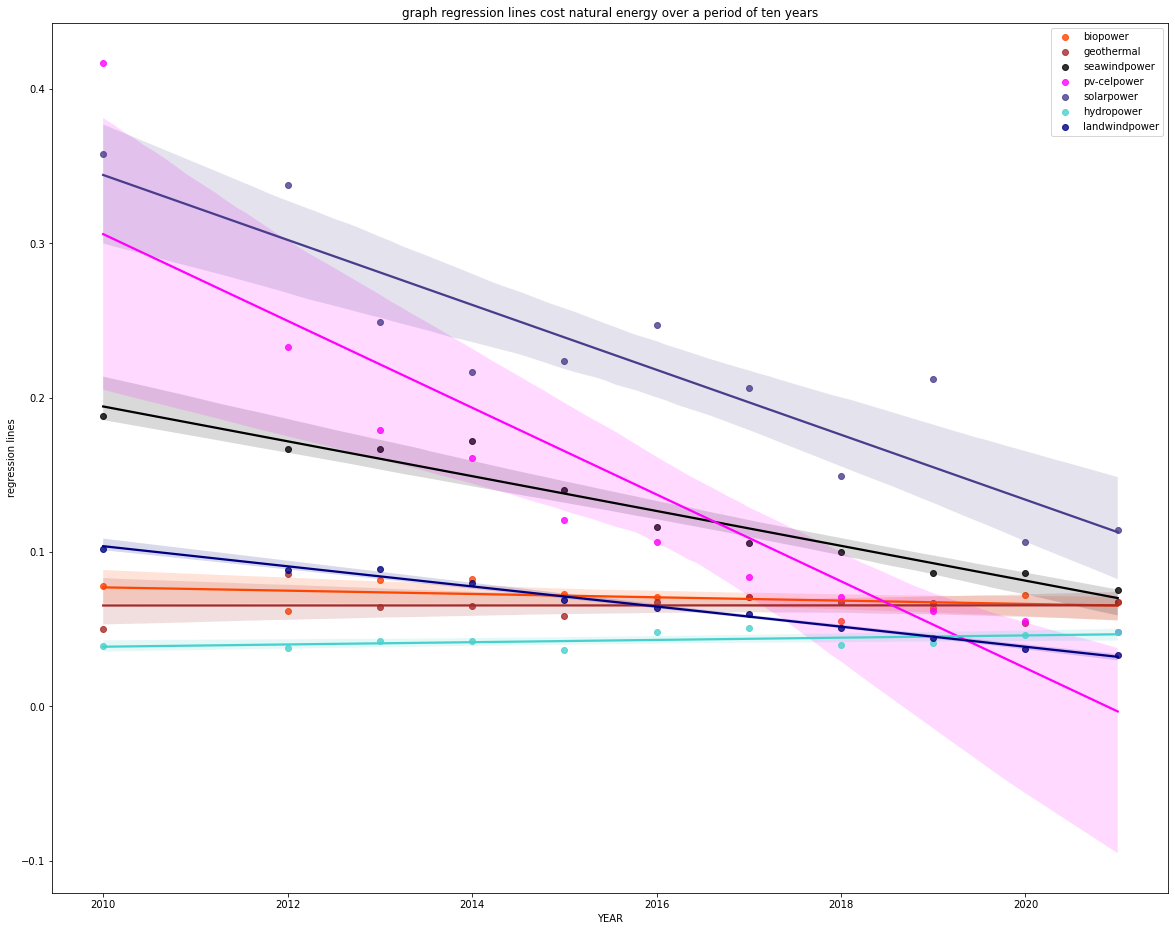

In [414]:
#Visualising the set results
fig, ax = plt.subplots()
sns.regplot(df_year, dfB, regressor.predict(df_year), color = 'orangered', label = "biopower")
sns.regplot(df_year, dfG, regressor.predict(df_year), color = 'brown', label = "geothermal")
sns.regplot(df_year, dfSE, regressor.predict(df_year), color = 'black', label = "seawindpower")
sns.regplot(df_year, dfP, regressor.predict(df_year), color = 'fuchsia', label = "pv-celpower")
sns.regplot(df_year, dfS, regressor.predict(df_year), color = 'darkslateblue', label = "solarpower")
sns.regplot(df_year, dfH, regressor.predict(df_year), color = 'mediumturquoise', label = "hydropower")
sns.regplot(df_year, dfL, regressor.predict(df_year), color = 'navy', label = "landwindpower")
plt.title('graph regression lines cost natural energy over a period of ten years')
plt.xlabel('YEAR')
plt.ylabel('regression lines')
plt.legend()

#under this cel you see some extra layout in calculation and coef averages from the dataset above. 
#in this overal beautiful plot you can clearly see the lines and meaning in energy resources about up and down cost over the years
#you see for example cost of solerpower of this specified period en its clear its much more cheaper today then ten years ago comparing
#to biopower, geothermal and hydropower there is a bit of a stagnation over this specific period, sometimes  it goes a bit up and then
#goes down again but not allot. Conclusion is that we need allot more investing and knowledge necesseary to find solutions over the time
#to make natural energy sources more accessible for everyone, and i think that is something for the coming generation of students make them motivated
#and study more in the direction of the technical professions and ingenering.

In [370]:
#combine all columns including data
combined = pd.concat([df_energy_names], ignore_index= False)
combined.head(11)

,year,biopower,geothermal,seawindpower,pv-celpower,solarpower,hydropower,landwindpower
Entity,,,,,,,,
World,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
World,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
World,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
World,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
World,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
World,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
World,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
World,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
World,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592


In [371]:
#let's checkout data
combined.describe()

,year,biopower,geothermal,seawindpower,pv-celpower,solarpower,hydropower,landwindpower
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2015.909091,0.070797,0.065448,0.127654,0.139870,0.220004,0.043008,0.065306
std,3.477198,0.008381,0.009239,0.040418,0.108821,0.079869,0.004707,0.022776
min,2010.000000,0.055360,0.050445,0.075167,0.048346,0.106653,0.036572,0.033123
25%,2013.500000,0.065638,0.061480,0.093218,0.066629,0.177658,0.039360,0.047736
50%,2016.000000,0.071178,0.067305,0.116323,0.106340,0.216377,0.042457,0.063855
75%,2018.500000,0.075480,0.067709,0.166631,0.170330,0.248079,0.047133,0.084297
max,2021.000000,0.082375,0.085695,0.187857,0.417149,0.358004,0.050722,0.102061


In [372]:
#import uniform from random librarie
from random import uniform

In [373]:
#import train_test_split from sklearn.model_selection librarie
from sklearn.model_selection import train_test_split

In [374]:
#check columns
combined.columns

Index(['year', 'biopower', 'geothermal', 'seawindpower', 'pv-celpower',
       'solarpower', 'hydropower', 'landwindpower'],
      dtype='object')

In [375]:
#check info
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, World to World
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           11 non-null     int64  
 1   biopower       11 non-null     float64
 2   geothermal     11 non-null     float64
 3   seawindpower   11 non-null     float64
 4   pv-celpower    11 non-null     float64
 5   solarpower     11 non-null     float64
 6   hydropower     11 non-null     float64
 7   landwindpower  11 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 792.0+ bytes


In [377]:
#train_test_split helps us split our data into a training and a test dataset:
X, y = combined[["biopower", "geothermal", "seawindpower", "pv-celpower", "solarpower", "hydropower", "landwindpower"]], combined["year"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [378]:
#Now let’s create and fit our model, but this time, we’ll train our model only on the training data:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [379]:
#Here’s how we can test how our model performs on previously unseen data:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

2.707540271609455

In [380]:
#Now let’s create a linear regression model as well, so we can compare the performance of the two models:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

3.188288407689397

In [381]:
#If you print lin_reg_model.coef_ you can see the linear regression model’s values for ß1 and ß2:
lin_reg_model.coef_

array([  95.47283004,   20.94188236,  -57.11425035,   35.22498601,
        -18.35921838,  -26.46064057, -146.00383644])

In [382]:
#You can similarly print the intercept with lin_reg_model.intercept_:
lin_reg_model.intercept_

2025.7278017952378

In [383]:
#Accordingly, if we print poly_reg_model.coef_, we’ll get the values for five coefficients (ß1, ß2, ß3, ß4, ß5):
poly_reg_model.coef_

array([ 4.53293775e+01,  2.27240389e+01, -4.66155405e+01, -1.94582044e-01,
        2.64800721e+00, -1.84146933e+01, -1.05899943e+02,  8.26896984e+00,
        4.77501943e+00,  1.27030707e+01,  1.85377692e+01,  1.11594219e+01,
        7.49833317e-01,  3.23607729e-02,  1.52762117e+00, -2.07514122e-03,
        2.12531802e-01,  3.11282248e+00, -1.20271769e+00, -6.07750314e+00,
        2.77327952e+01,  3.97476408e+01, -1.60199052e+01, -4.37932050e-01,
        2.41206891e+00,  4.43830210e+01, -1.75578208e+01,  2.72728050e+00,
        9.74556086e+00, -2.46104167e+01, -1.80337318e+00, -2.51374981e+01,
       -2.85110005e+00, -4.47269278e+00, -4.65343449e+00])

In [384]:
#But let’s get back to comparing our models’ performances by printing lin_reg_rmse:
lin_reg_rmse

3.188288407689397